# 実験 II (2023 年度後期) 第 3 回 資料 3

2023.10.10 (火) 第 3, 4 限  
岡田 真

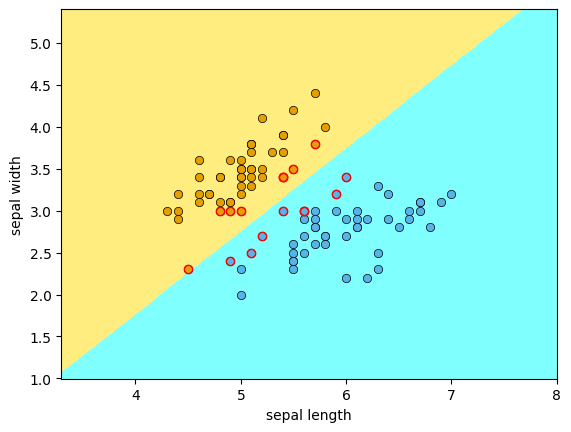

In [ ]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは2 (iris virginica) でないもの,
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]

# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()


### 解説

最初はパッケージやモジュールの読み込み．  
`scikit-learn`, `NumPy`, `matplotlib` などのパッケージのモジュールを読み込んでいる

```
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
```

これはアヤメのデータを確認したときと一緒

```
# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target
```

ここで使う特徴量を選んでいる．  
前回の課題とは違う書き方で書いている．  
前回はこう．  
```
X = X[:, [0,1]]
```
どこを使うかという情報を Python のリストの `slice` を使って与えていると
考えたらいい．  
前回のは 0 番目と 1 番目を直接指定していて，今回のは 2 番目 (実際の 3 番目)
までを使うと指定している．

```
# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]
```
ここはターゲットの指定．  
`numpy.ndarray` (NumPy 配列) に条件を与えてそれを満たすものを選ぶ
形で "iris setosa" と "iris versicolor" を選んでいる．
```
# ターゲットは2 (iris virginica) でないもの,
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]

```
Support Vector Machine (SVM) の呼び出しと実行．  
SVM のクラスを呼び出して分類器を用意して，データに適合 (fit) させる．  
これだけ．簡単．

`sklearn` パッケージには分類器の設計図にあたるいろいろなクラスが用意されている．  
SVM には `svm` モジュールが用意されていて，今回はその中で分類 (Classify) 用の
`svm.SVC` クラス (Support Vector Clasifier, SVC) を使ってアヤメの分類器を作る．  
NumPy や matplotlib で同じように import したパッケージ内のモジュールを使って自分用にカスタマイズして使ってますよね？  
(`numpy.ndarray` とか `matplotlib.pyplot` とか)

scikit-learn に含まれている様々な機械学習のモジュールがあるけれど，
学習は大体この形 (`fit()` を呼び出す) になっているので，一つ慣れれば
あとは大体同じ使い方ができる．

パラメータは C と kernel の 2 個を使っている．
- kernel : 使用するカーネル．ここでは `linear` ，つまり線形カーネルを
使うよう指示している．カーネルには他にも `poli` (多項式カーネル), `rbf` (ガウシアンカーネル) などがある．
- C : 境界を決める際のペナルティの寄与の大きさ．正則化パラメータと呼ばれる．  
C が大きいとより厳密に，C が小さいとペナルティに寛容になる．  
つまり，C の大きさが性能に影響を与える．

```
# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

```
表示部．  
細かく表示するためにいろいろと手を入れているけど，
本質的な部分は前回やった通り．  
点をプロットして表示するところ．

```
##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')
```
ここまで背景などの準備．  
データを変えたら軸ラベルや各クラスのデータの色を変えればよい．

ここから表示するデータの準備．

```
##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()
```

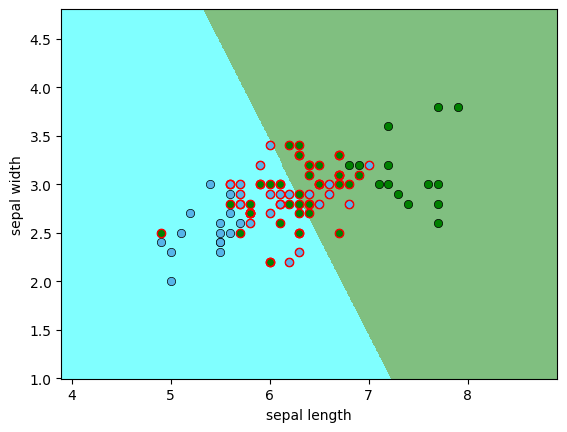

In [ ]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは0 (iris setosa) でないもの,
# つまり iris versicolor (1) と iris virginica (2) のみを対象とする
# (領域の2分割)
X = X[y!=0]
y = y[y!=0]

# 分類用にサポートベクトルマシンを用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(1か2)の予測をZに格納
Z = clf.predict(Xg)

# グリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
# クラス2 (iris setosa) が薄緑 (0.5, 0.75, 0.5, 1)
cmap12 = ListedColormap([(0.5, 0.75, 0.5, 1), (0.5, 1, 1, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==1, cmap=cmap12, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]
# iris virginica (y=2) のデータのみを取り出す
Xc2 = X[y==2]

# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9',linewidth=0.5, edgecolors='black')
# iris virginica のデータXc2をプロット
plt.scatter(Xc2[:,0], Xc2[:,1], c='#008000',linewidth=0.5, edgecolors='black')

# サポートベクトルの取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()


## 練習 4
上記 2 個のソースコードを動かして，結果を確認すること．  
前回の内容とも比較して理解を深めること．  

動作させるのは，Google Colab 上でもローカルマシン上でもどちらでも可．  
できれば両方で動かしてみましょう．

# 演習課題
## 演習課題 3-1
「"iris setosa" と "iris versicolor"」以外のデータで同様のことをやってみよう．  
データの組み合わせを  

  - 「"iris setosa" と "iris virginica"」，  
  - 「"iris versicolor" と "iris virginica"」  

として，それぞれのデータの正解率を求めよう．
ただし，パラメータ `C` と `kernel` は変更しない．

## 演習課題 3-2
「"iris setosa" と "iris versicolor"」のデータを使って，`svm.SVC` のパラメータ `C` の値を 1.0, 0.1, 0.01, 0.001 と変更して，それぞれのデータの散布図と正解率がどのように変化するか確認しよう．


演習課題3-1

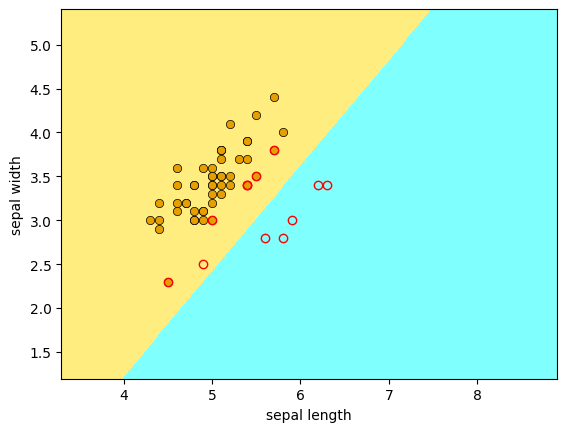

正解率
99.0


In [2]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは1 (iris versicolor) でないもの,
# つまり iris setosa (0) と iris virginica (2) のみを対象とする
# (領域の2分割)
X = X[y!=1]
y = y[y!=1]

# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()
prediction = clf.predict(X)
total = len(X)
success = np.sum(prediction == y)
print('正解率')
print(100.0*success/total)

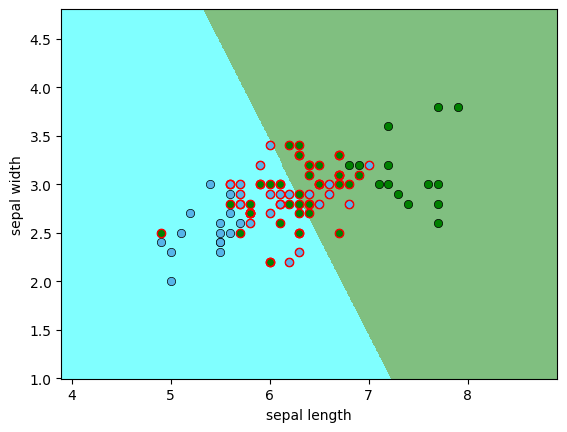

正解率
73.0


In [3]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは0 (iris setosa) でないもの,
# つまり iris versicolor (1) と iris virginica (2) のみを対象とする
# (領域の2分割)
X = X[y!=0]
y = y[y!=0]

# 分類用にサポートベクトルマシンを用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(1か2)の予測をZに格納
Z = clf.predict(Xg)

# グリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
# クラス2 (iris setosa) が薄緑 (0.5, 0.75, 0.5, 1)
cmap12 = ListedColormap([(0.5, 0.75, 0.5, 1), (0.5, 1, 1, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==1, cmap=cmap12, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]
# iris virginica (y=2) のデータのみを取り出す
Xc2 = X[y==2]

# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9',linewidth=0.5, edgecolors='black')
# iris virginica のデータXc2をプロット
plt.scatter(Xc2[:,0], Xc2[:,1], c='#008000',linewidth=0.5, edgecolors='black')

# サポートベクトルの取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()

prediction = clf.predict(X)
total = len(X)
success = np.sum(prediction == y)
print("正解率")
print(100 * success / total)

演習課題3-2

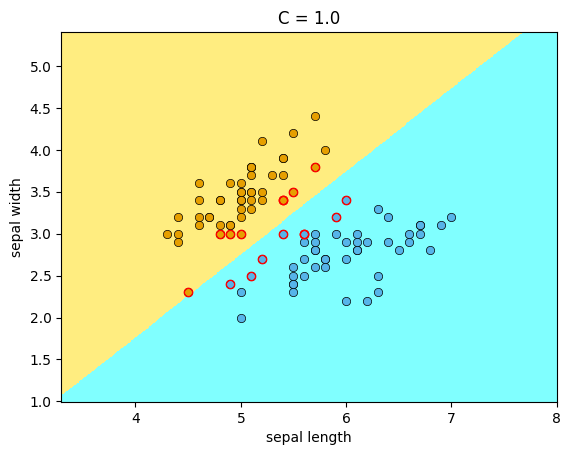

正解率
100.0


In [9]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは2 (iris virginica) でないもの,
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]

# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.title('C = 1.0')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()
prediction = clf.predict(X)
total = len(X)
success = np.sum(prediction == y)
print('正解率')
print(100.0*success/total)


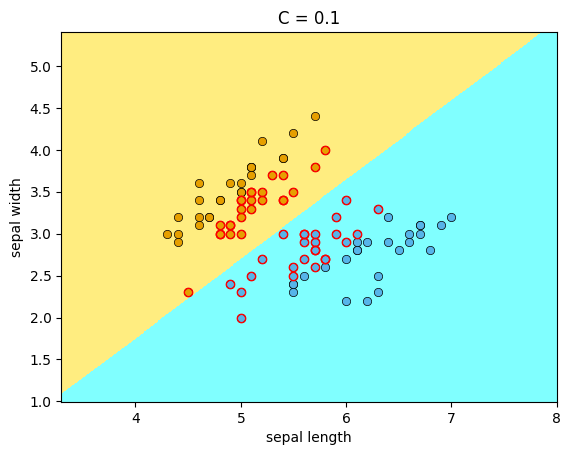

正解率
100.0


In [10]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは2 (iris virginica) でないもの,
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]

# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=0.1, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.title('C = 0.1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()
prediction = clf.predict(X)
total = len(X)
success = np.sum(prediction == y)
print('正解率')
print(100.0*success/total)

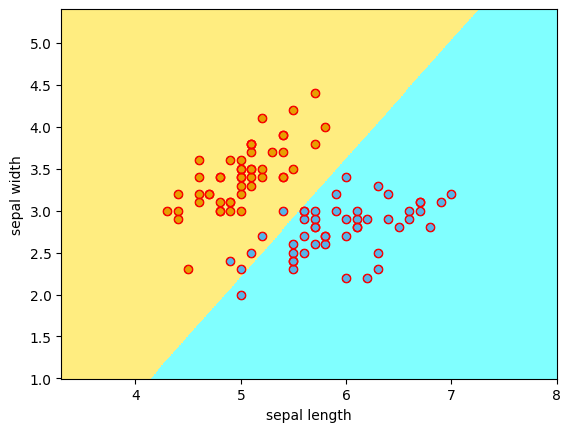

正解率
95.0


In [6]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは2 (iris virginica) でないもの,
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]

# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=0.01, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.title('C = 0.01')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()
prediction = clf.predict(X)
total = len(X)
success = np.sum(prediction == y)
print('正解率')
print(100.0*success/total)

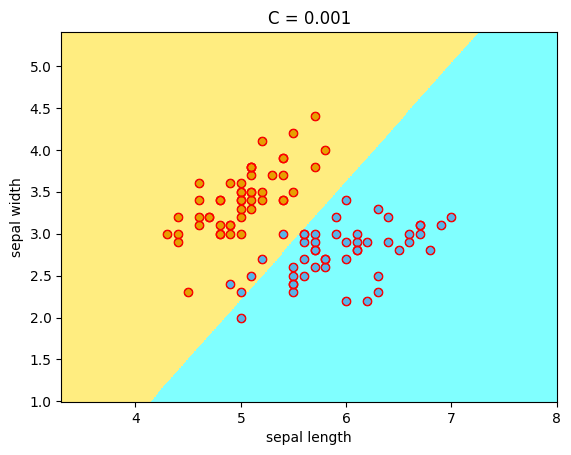

正解率
95.0


In [11]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは2 (iris virginica) でないもの,
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]

# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=0.001, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.title('C = 0.001')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()
prediction = clf.predict(X)
total = len(X)
success = np.sum(prediction == y)
print('正解率')
print(100.0*success/total)